In [322]:
# Importing libraries
import numpy as np # For working with numbers, arrays, and math. for example:fast calculations like averages or creating arrays.
import pandas as pd # For handling tables and data (like Excel in Python). for example: read CSV files, filter rows, create new columns.
import matplotlib.pyplot as plt # For creating basic charts like line plots, bar charts, scatter plots.
import seaborn as sns # Makes better-looking charts easily (built on top of matplotlib).

# Machine learning tools
from sklearn.linear_model import LinearRegression # Predicts a number (like profit) based on input features.
from sklearn.linear_model import LogisticRegression # Used to predict categories (yes/no, win/lose, etc.).
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Simplifies your data by reducing the number of features while keeping the most important information.
from sklearn.ensemble import RandomForestRegressor # A strong model that uses many decision trees to make better predictions.
from sklearn.metrics import r2_score # Shows how good your model is (1 = perfect, 0 = not useful).
from sklearn.metrics import mean_squared_error # Measures how far off predictions are (lower = better).
from sklearn.cluster import KMeans # Groups similar data into clusters (used in segmentation).
from sklearn.model_selection import train_test_split # Splits your data into training and testing sets. for example: 80% to train, 20% to test.
from sklearn.preprocessing import LabelEncoder # Turns text (like country names or product names) into numbers. 
from sklearn.preprocessing import StandardScaler # Standardizes data (makes values centered and scaled).example: makes features like "price" and "units" easier to compare.

In [323]:
# Loading dataset
kevin_Cookies_data = "C:/Users/User/Downloads/Kevin Cookie Company Financials(Cookie Sales).csv"

# Loading Our Data into  DataFrame
df = pd.read_csv(kevin_Cookies_data, delimiter=",")

In [324]:
# Read our DataFrame
df

,Country,Product,Units Sold,Revenue per cookie,Cost per cookie,Revenue,Cost,Profit,Date,Month Number,Month Name,Year
0,Canada,Chocolate Chip,292.0,$5.00,$2.00,"$1,460.00",$584.00,$876.00,01/02/2019,2,February,2019
1,Mexico,Chocolate Chip,974.0,$5.00,$2.00,"$4,870.00","$1,948.00","$2,922.00",01/02/2019,2,February,2019
2,Canada,Chocolate Chip,2518.0,$5.00,$2.00,"$12,590.00","$5,036.00","$7,554.00",01/06/2019,6,June,2019
3,Germany,Chocolate Chip,1006.0,$5.00,$2.00,"$5,030.00","$2,012.00","$3,018.00",01/06/2019,6,June,2019
4,Germany,Chocolate Chip,367.0,$5.00,$2.00,"$1,835.00",$734.00,"$1,101.00",01/07/2019,7,July,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
695,France,White Chocolate Macadamia Nut,2826.0,$6.00,$2.75,"$16,956.00","$7,771.50","$9,184.50",01/05/2019,5,May,2019
696,France,White Chocolate Macadamia Nut,663.0,$6.00,$2.75,"$3,978.00","$1,823.25","$2,154.75",01/09/2019,9,September,2019
697,United States,White Chocolate Macadamia Nut,2574.0,$6.00,$2.75,"$15,444.00","$7,078.50","$8,365.50",01/11/2018,11,November,2018
698,United States,White Chocolate Macadamia Nut,2438.0,$6.00,$2.75,"$14,628.00","$6,704.50","$7,923.50",01/12/2018,12,December,2018


In [325]:
# Display all the column names
print(df.columns.tolist())


['Country', ' Product ', 'Units Sold', ' Revenue per cookie ', ' Cost per cookie ', ' Revenue ', ' Cost ', ' Profit ', 'Date', 'Month Number', ' Month Name ', 'Year']


In [326]:
"There is too much spaces in some columns between the column's names and brackets. we should clean it up"

"There is too much spaces in some columns between the column's names and brackets. we should clean it up"

In [327]:
# remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()


In [328]:
# Display all column names again
print(df.columns.tolist())

['Country', 'Product', 'Units Sold', 'Revenue per cookie', 'Cost per cookie', 'Revenue', 'Cost', 'Profit', 'Date', 'Month Number', 'Month Name', 'Year']


In [329]:
# Display only one column
df['Product']

0                      Chocolate Chip 
1                      Chocolate Chip 
2                      Chocolate Chip 
3                      Chocolate Chip 
4                      Chocolate Chip 
                    ...               
695     White Chocolate Macadamia Nut 
696     White Chocolate Macadamia Nut 
697     White Chocolate Macadamia Nut 
698     White Chocolate Macadamia Nut 
699     White Chocolate Macadamia Nut 
Name: Product, Length: 700, dtype: object

In [330]:
# Display the data types of each column
display( df.dtypes)

Country                object
Product                object
Units Sold            float64
Revenue per cookie     object
Cost per cookie        object
Revenue                object
Cost                   object
Profit                 object
Date                   object
Month Number            int64
Month Name             object
Year                    int64
dtype: object

In [331]:
# Clean or remove dollar signs and commas
columns_to_convert = ['Revenue per cookie', 'Cost per cookie', 'Revenue', 'Cost', 'Profit']
df[columns_to_convert] = df[columns_to_convert].replace({'\\$': '', ',': ''}, regex=True).astype(float)

In [332]:
# Display or check how our data looks like now
display(df.head())

,Country,Product,Units Sold,Revenue per cookie,Cost per cookie,Revenue,Cost,Profit,Date,Month Number,Month Name,Year
0,Canada,Chocolate Chip,292.0,5.0,2.0,1460.0,584.0,876.0,01/02/2019,2,February,2019
1,Mexico,Chocolate Chip,974.0,5.0,2.0,4870.0,1948.0,2922.0,01/02/2019,2,February,2019
2,Canada,Chocolate Chip,2518.0,5.0,2.0,12590.0,5036.0,7554.0,01/06/2019,6,June,2019
3,Germany,Chocolate Chip,1006.0,5.0,2.0,5030.0,2012.0,3018.0,01/06/2019,6,June,2019
4,Germany,Chocolate Chip,367.0,5.0,2.0,1835.0,734.0,1101.0,01/07/2019,7,July,2019


In [333]:
# convert Date column into a proper datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


In [334]:
# Display or check how our data looks like after converting Data column
display(df.head())

,Country,Product,Units Sold,Revenue per cookie,Cost per cookie,Revenue,Cost,Profit,Date,Month Number,Month Name,Year
0,Canada,Chocolate Chip,292.0,5.0,2.0,1460.0,584.0,876.0,2019-02-01,2,February,2019
1,Mexico,Chocolate Chip,974.0,5.0,2.0,4870.0,1948.0,2922.0,2019-02-01,2,February,2019
2,Canada,Chocolate Chip,2518.0,5.0,2.0,12590.0,5036.0,7554.0,2019-06-01,6,June,2019
3,Germany,Chocolate Chip,1006.0,5.0,2.0,5030.0,2012.0,3018.0,2019-06-01,6,June,2019
4,Germany,Chocolate Chip,367.0,5.0,2.0,1835.0,734.0,1101.0,2019-07-01,7,July,2019


In [335]:
# Display data general informations after cleaning
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Country             700 non-null    object        
 1   Product             700 non-null    object        
 2   Units Sold          700 non-null    float64       
 3   Revenue per cookie  700 non-null    float64       
 4   Cost per cookie     700 non-null    float64       
 5   Revenue             700 non-null    float64       
 6   Cost                700 non-null    float64       
 7   Profit              700 non-null    float64       
 8   Date                700 non-null    datetime64[ns]
 9   Month Number        700 non-null    int64         
 10  Month Name          700 non-null    object        
 11  Year                700 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(3)
memory usage: 65.8+ KB


None

In [336]:
# Separate numerical and categorical variables
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print(f"Numerical variables: {numerical_cols}")
print(f"Categorical variables: {categorical_cols}")

Numerical variables: ['Units Sold', 'Revenue per cookie', 'Cost per cookie', 'Revenue', 'Cost', 'Profit', 'Month Number', 'Year']
Categorical variables: ['Country', 'Product', 'Month Name']


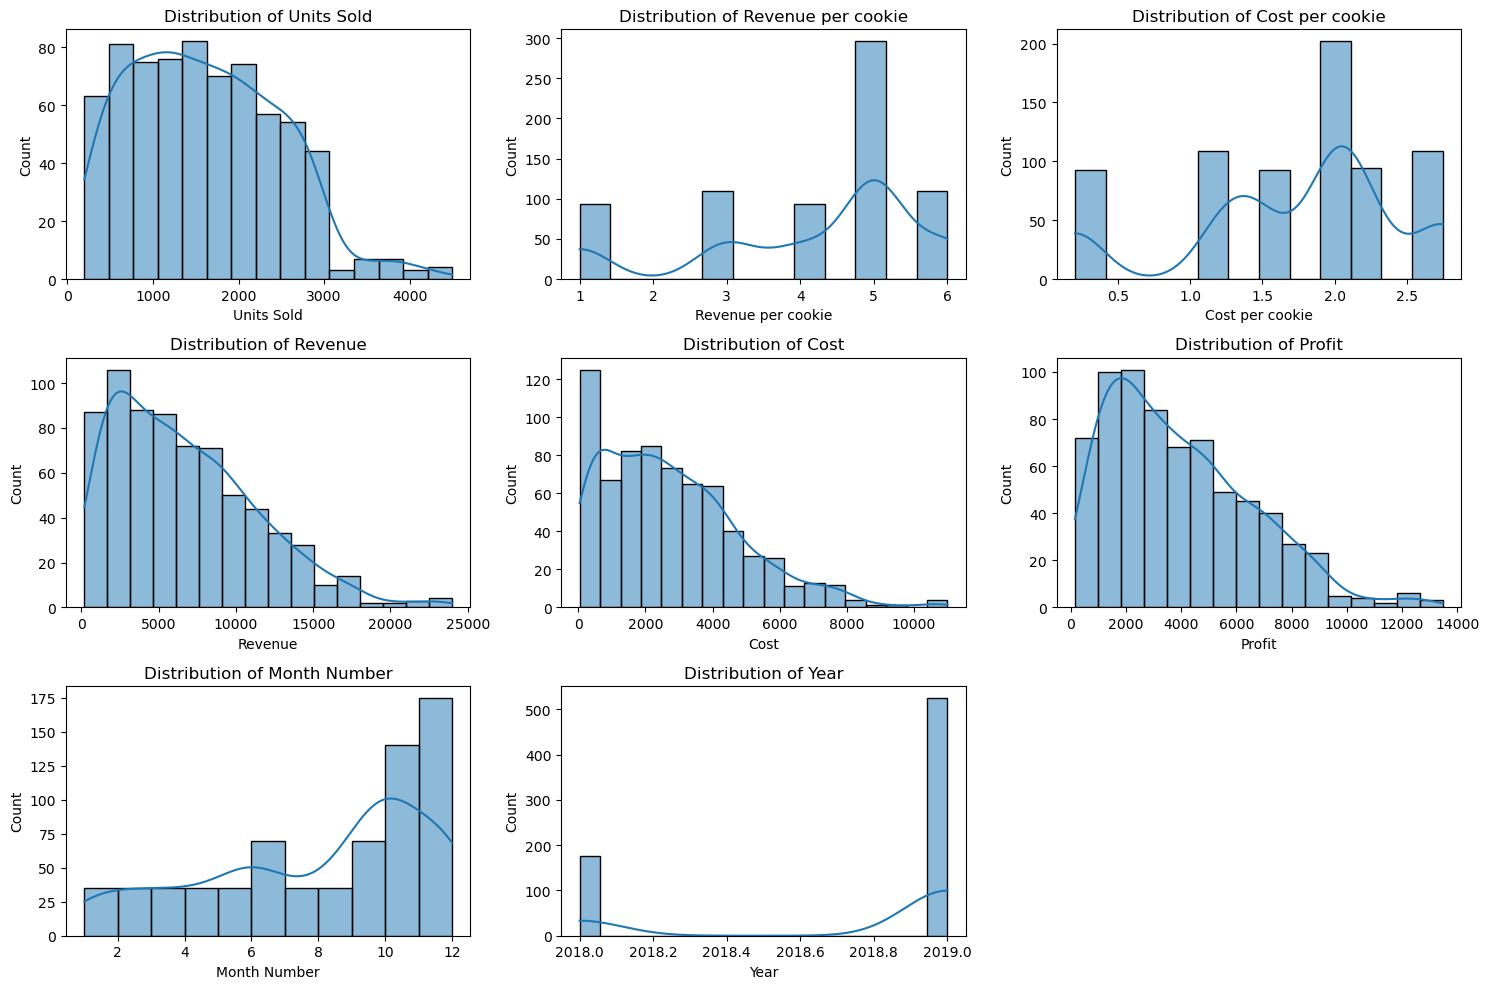

In [337]:
# Distribution of numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [338]:
"We make these graphs to:"
"Understand the data — Are the numbers mostly small or big?"

"Find mistakes — Are there any weird or wrong numbers ? (Maybe there’s a negative number in a column that shouldn’t have one (like negative sales).)"

Prepare for analysis — Make sure the data is ready to use."

SyntaxError: invalid character '—' (U+2014) (2188840381.py, line 6)

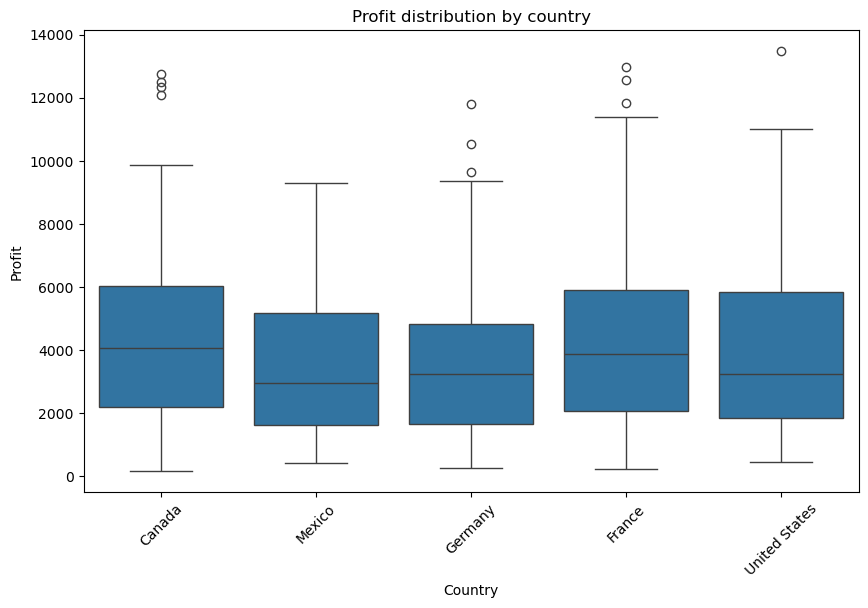

In [339]:
# Profit analysis by country
plt.figure(figsize=(10, 6))
sns.boxplot(x="Country", y="Profit", data=df)
plt.title("Profit distribution by country")
plt.xticks(rotation=45)
plt.show()

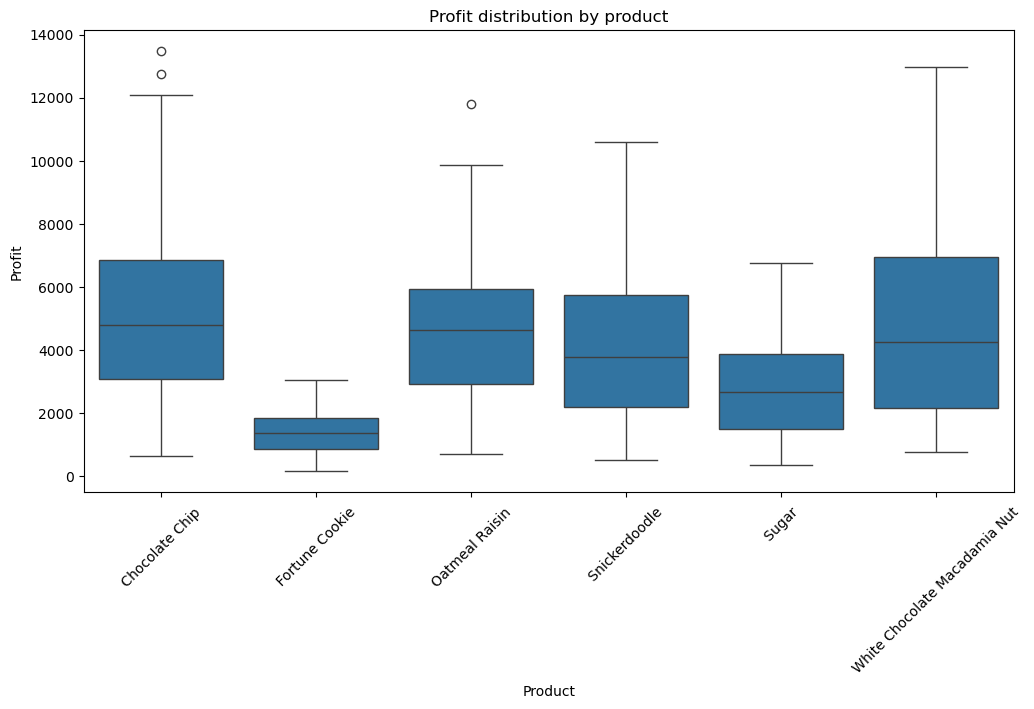

In [340]:
# Profit analysis by product
plt.figure(figsize=(12, 6))
sns.boxplot(x="Product", y="Profit", data=df)
plt.title("Profit distribution by product")
plt.xticks(rotation=45)
plt.show()

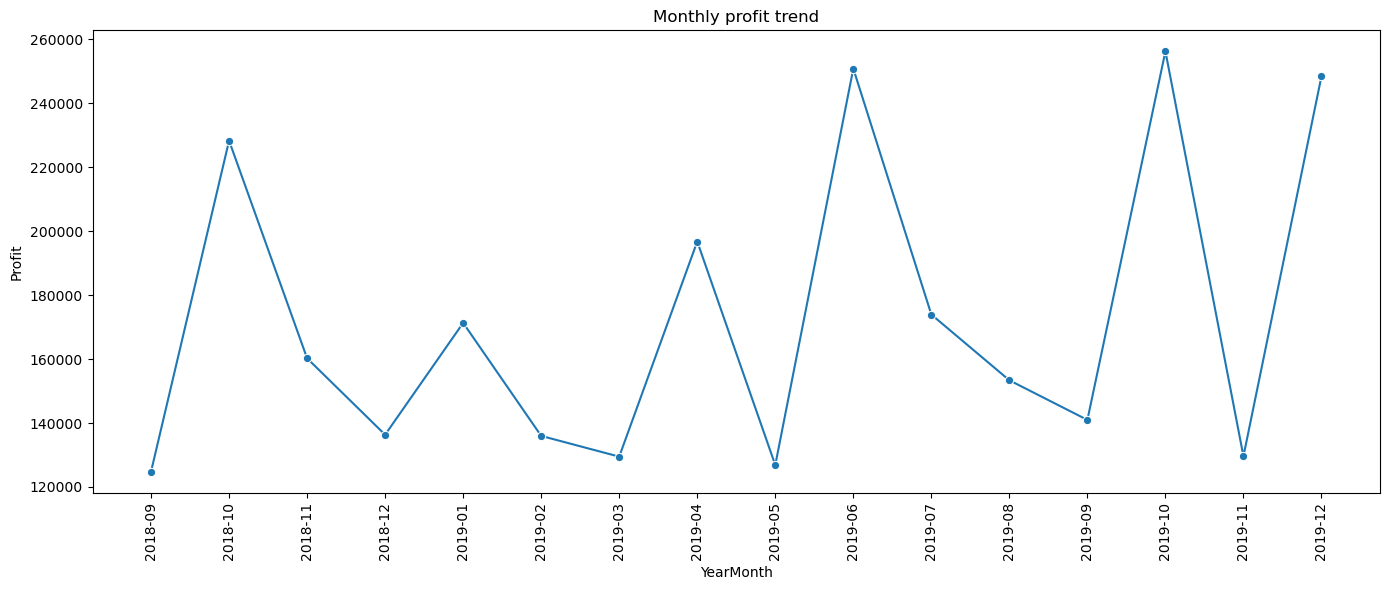

In [341]:
# Analysis of profit trend over time
monthly_profit = df.groupby(["Year", "Month Number"])["Profit"].sum().reset_index()
monthly_profit["YearMonth"] = monthly_profit["Year"].astype(str) + "-" + monthly_profit["Month Number"].astype(str).str.zfill(2)
plt.figure(figsize=(14, 6))
sns.lineplot(x="YearMonth", y="Profit", data=monthly_profit, marker="o")
plt.title("Monthly profit trend")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

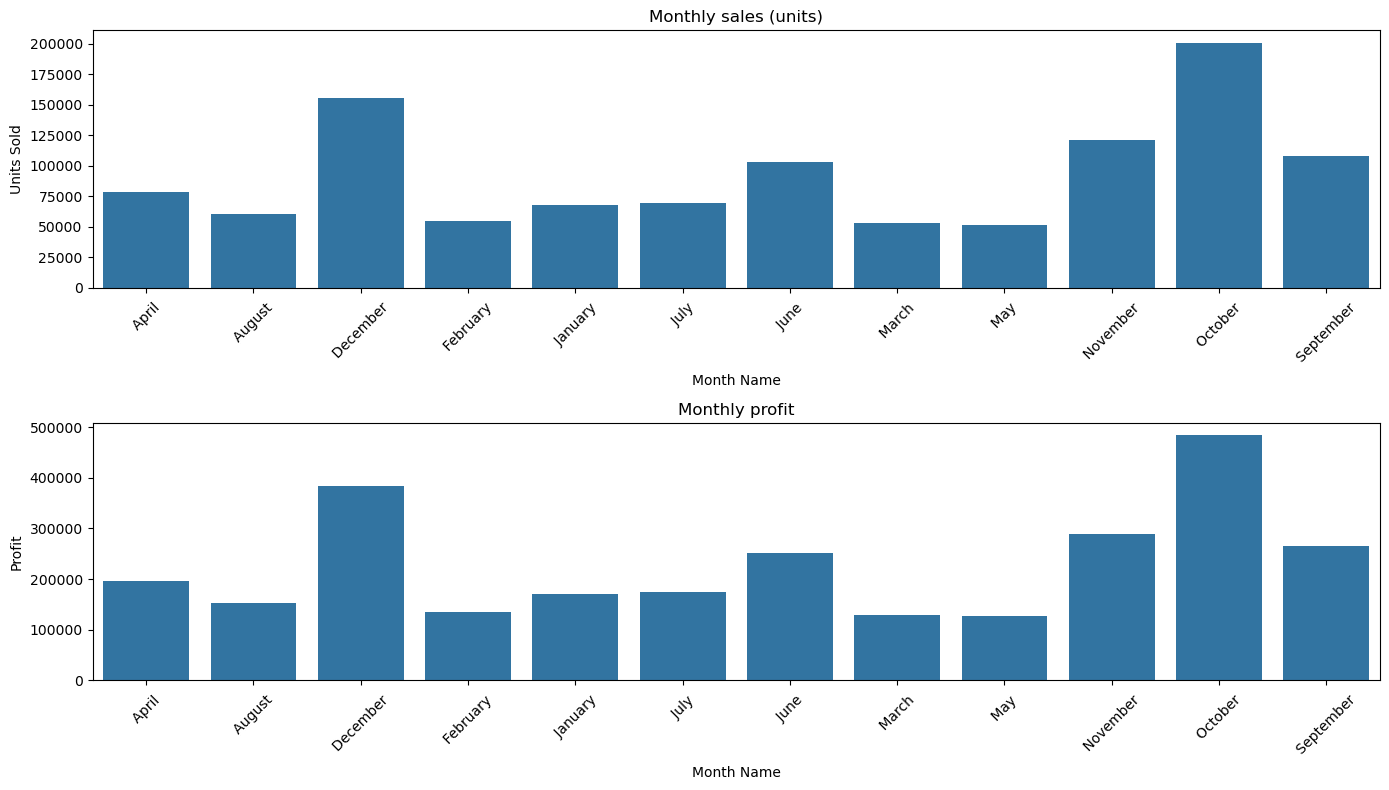


Seasonal analysis of sales and profits:


,Month Name,Units Sold,Profit
0,April,78886.5,196750.90
1,August,60705.0,153357.20
2,December,155306.0,384764.70
3,February,55115.0,135968.25
4,January,67835.5,171305.76
5,July,69349.0,173919.82
6,June,103302.0,250815.45
7,March,53420.0,129483.05
8,May,51771.0,126856.85
9,November,121131.0,289837.10


In [342]:
# Seasonal analysis of sales and profits
seasonal_analysis = df.groupby(['Month Name', 'Month Number']).agg({
    'Units Sold': 'sum',
    'Revenue': 'sum',
    'Cost': 'sum',
    'Profit': 'sum'
}).reset_index()

# Sort by month
month_order = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
seasonal_analysis['Month_Order'] = seasonal_analysis["Month Name"].map(month_order)
seasonal_analysis = seasonal_analysis.sort_values("Month_Order")

plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='Month Name', y='Units Sold', data=seasonal_analysis, order=seasonal_analysis['Month Name'])
plt.title('Monthly sales (units)')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(x="Month Name", y="Profit", data=seasonal_analysis, order=seasonal_analysis["Month Name"])
plt.title("Monthly profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nSeasonal analysis of sales and profits:")
display(seasonal_analysis[["Month Name", "Units Sold", "Profit"]])


In [343]:
PCA helps reduce columns but keep the important info.

We first scale the data.

Then we run PCA.

Finally, we check how many components we need to keep ~95% of the data's meaning.

SyntaxError: unterminated string literal (detected at line 7) (1582589583.py, line 7)



3. PRINCIPAL COMPONENT ANALYSIS (PCA)
------------------------------------------
Variance explained by component:
PC1: 0.7086 (0.7086 cumulated)
PC2: 0.2755 (0.9841 cumulated)
PC3: 0.0116 (0.9957 cumulated)
PC4: 0.0040 (0.9997 cumulated)
PC5: 0.0003 (1.0000 cumulated)
PC6: 0.0000 (1.0000 cumulated)


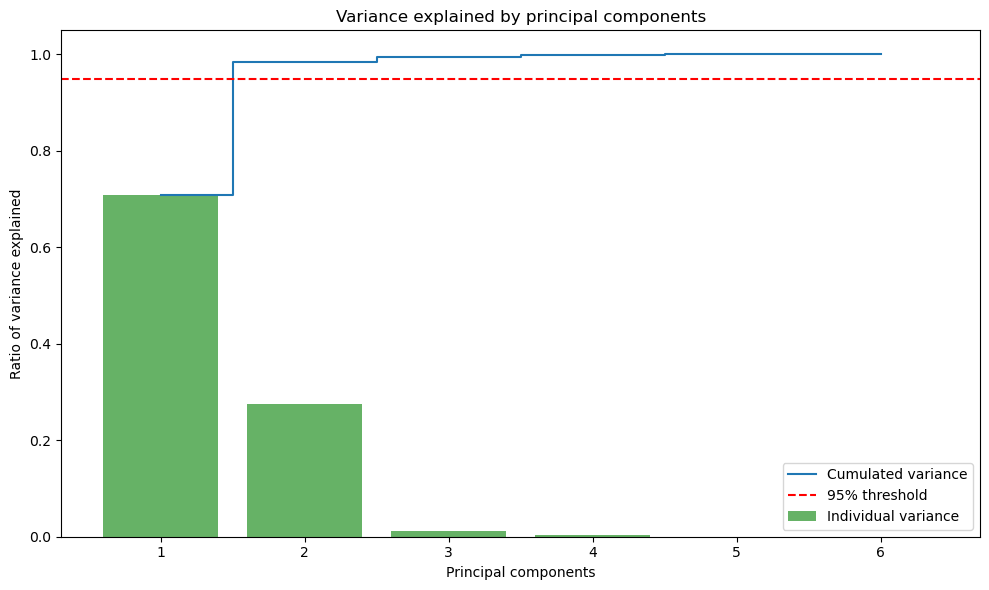

In [344]:
# 3. PRINCIPAL COMPONENT ANALYSIS (PCA)
print("\n\n3. PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("------------------------------------------")

# Select variables for PCA (exclude date-related variables)
acp_features = ["Units Sold", "Revenue per cookie", "Cost per cookie", "Revenue", "Cost", "Profit"]

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[acp_features])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Analyze explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Variance explained by component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulated)")

# Explained variance graph
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color="g", label="Individual variance")
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where="mid", label="Cumulated variance")
plt.axhline(y=0.95, color="r", linestyle="--", label="95% threshold")
plt.xlabel("Principal components")
plt.ylabel("Ratio of variance explained")
plt.title("Variance explained by principal components")
plt.legend(loc="best")
plt.tight_layout()
plt.show()



In [345]:
"K-Means Clustering is a method that groups similar data points together into clusters.

"K" means the number of groups you want.

The algorithm finds the best way to separate your data into these K groups.

Each group is called a cluster.

Why is it useful?
To find patterns or hidden groups in your data.

Helps you organize data when there are no labels.

Example:
A cookie company wants to group stores based on sales behavior — K-Means can help find which stores behave similarly."

SyntaxError: unterminated string literal (detected at line 1) (3223552515.py, line 1)



4. KMEANS CLUSTERING
-------------------------


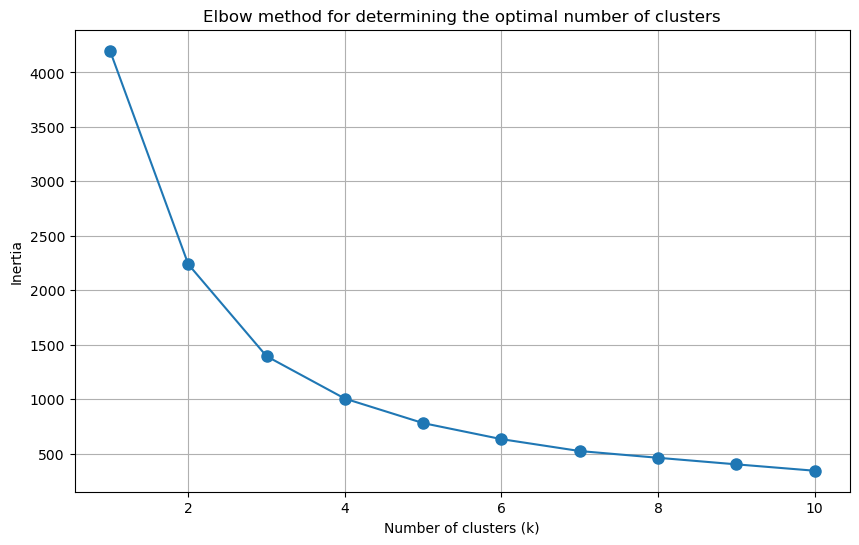

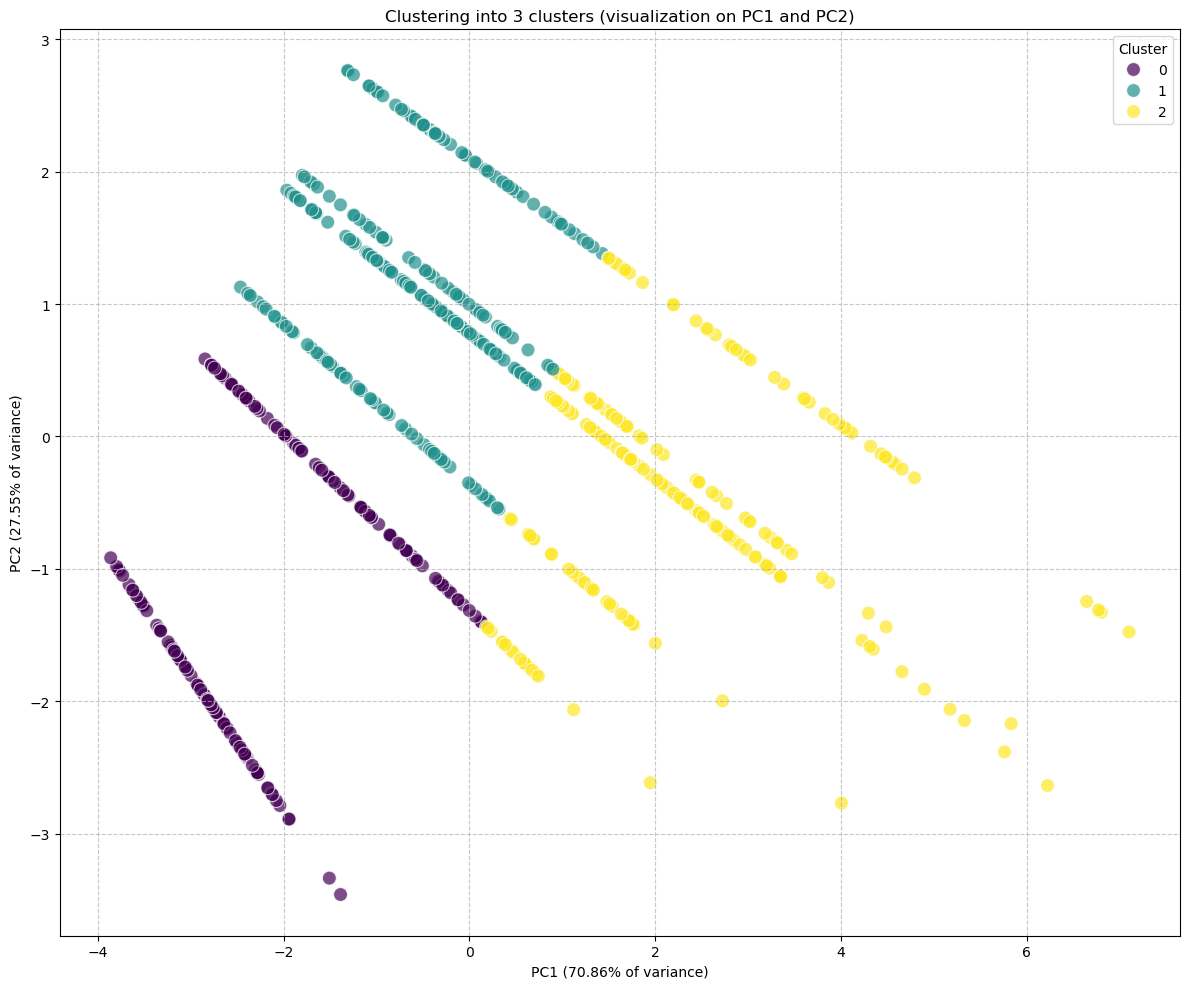


Average characteristics by cluster:
   Cluster   Units Sold  Revenue per cookie  Cost per cookie       Revenue  \
0        0  1470.240437            1.983607         0.716393   2725.497268   
1        1   958.771898            4.992701         2.086131   4725.510949   
2        2  2444.644033            4.917695         2.066667  11920.553498   

          Cost       Profit           Product  Country  
0   953.058087  1772.439508   Fortune Cookie    France  
1  1961.024453  2764.486496   Chocolate Chip   Germany  
2  5000.808436  6919.745267   Chocolate Chip    Canada  


<Figure size 1400x800 with 0 Axes>

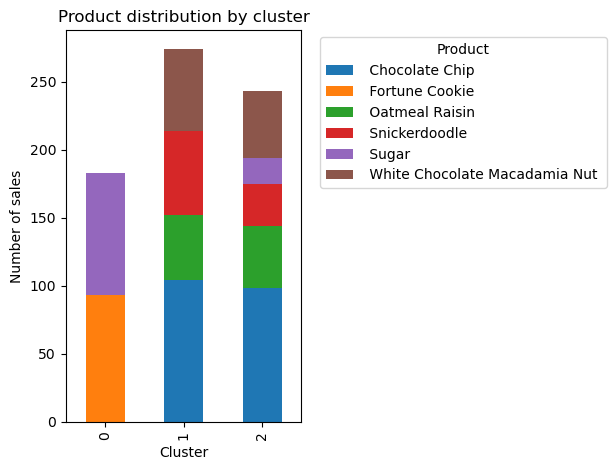

In [346]:
# 4. KMEANS CLUSTERING
print("\n\n4. KMEANS CLUSTERING")
print("-------------------------")

# Using principal components for clustering
X_cluster = pca_result

# Determining the optimum number of clusters (elbow method)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Inertia graph (elbow method)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, "o-", markersize=8)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow method for determining the optimal number of clusters")
plt.grid(True)
plt.show()

# Determine the optimal number of clusters (visually from the graph)
optimal_k = 3 

# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster)

# Add cluster to original dataframe
df["Cluster"] = clusters

# Visualize clusters on the first two principal components
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1],
    hue=clusters,
    palette="viridis",
    alpha=0.7,
    s=100
)
plt.title(f'Clustering into {optimal_k} clusters (visualization on PC1 and PC2)')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} of variance)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} of variance)')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('kmeans_clusters.png')
plt.show()

# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster').agg({
    'Units Sold': 'mean',
    'Revenue per cookie': 'mean',
    'Cost per cookie': 'mean',
    'Revenue': 'mean',
    'Cost': 'mean',
    'Profit': 'mean',
    'Product': lambda x: x.value_counts().index[0],
    'Country': lambda x: x.value_counts().index[0]
}).reset_index()

print("\nAverage characteristics by cluster:")
print(cluster_analysis)

# Product distribution by cluster
plt.figure(figsize=(14, 8))
cluster_product = pd.crosstab(df['Cluster'], df['Product'])
cluster_product.plot(kind='bar', stacked=True)
plt.title('Product distribution by cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of sales')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('cluster_product_distribution.png')
plt.show()


In [347]:
What is Predictive Modeling for Profit?
It’s using math and machine learning to predict future profit based on past data.

You build a model (like a calculator) that learns:

"If we sell this many cookies at this cost... how much profit will we make?"

Why is it useful?
To plan better (e.g., how many cookies to bake).

To see what affects profit the most (like cost, sales, or price).

To make smart decisions for the future.

SyntaxError: invalid character '’' (U+2019) (2161154923.py, line 2)



5. PREDICTIVE MODELING FOR PROFIT
----------------------------------------

Model 1: Linear Regression
MSE: 493464.88
R² (accuracy): 0.9423

Linear Regression Coefficients:
              Feature  Coefficient
1  Revenue per cookie  1785.538435
5           Month_Sin    46.927185
6           Month_Cos    14.575478
0          Units Sold     2.464187
3     Product_encoded    -3.178938
4     Country_encoded    -3.930664
2     Cost per cookie -1960.934801

Model 2: Random Forest Regressor
MSE: 42106.52
R² (accuracy): 0.9951

Feature Importance (Random Forest):
              Feature  Importance
0          Units Sold    0.705794
1  Revenue per cookie    0.151443
2     Cost per cookie    0.126843
3     Product_encoded    0.014175
4     Country_encoded    0.000815
6           Month_Cos    0.000535
5           Month_Sin    0.000396


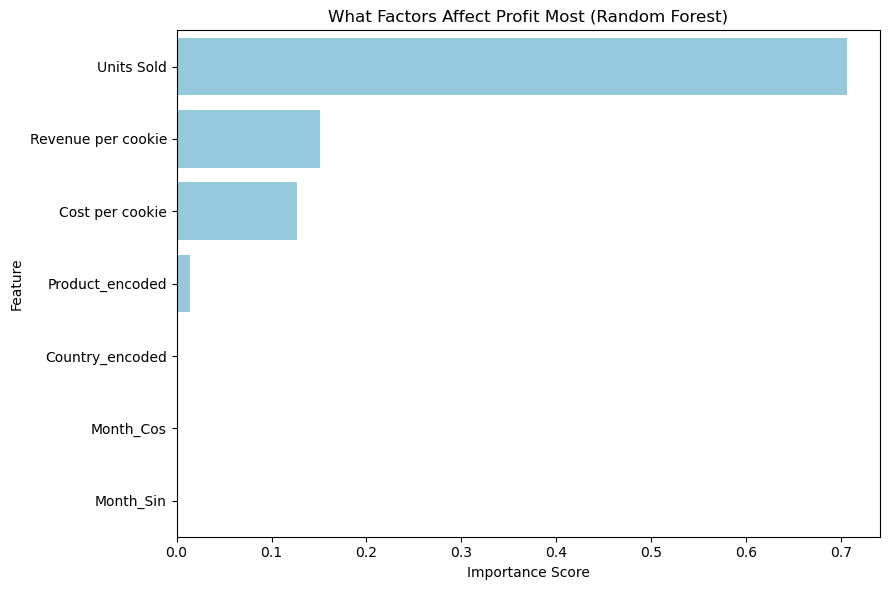

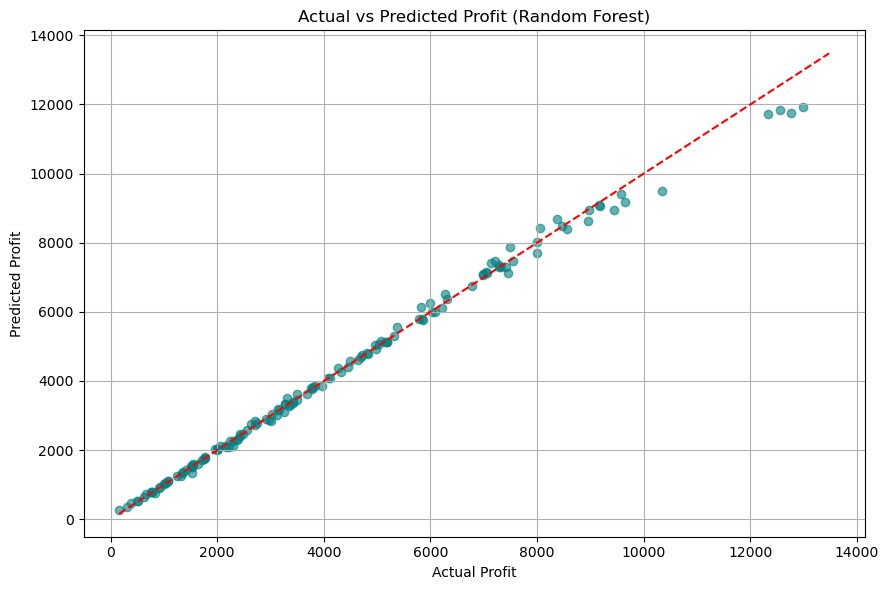

In [348]:

# Predictive Modeling for Profit
print("\n\n5. PREDICTIVE MODELING FOR PROFIT")
print("----------------------------------------")

# Encode text columns into numbers
le_product = LabelEncoder()
le_country = LabelEncoder()
df['Product_encoded'] = le_product.fit_transform(df['Product'])
df['Country_encoded'] = le_country.fit_transform(df['Country'])

# Add seasonal (monthly) pattern features
df['Month_Sin'] = np.sin(2 * np.pi * df['Month Number'] / 12)
df['Month_Cos'] = np.cos(2 * np.pi * df['Month Number'] / 12)

# Input features (X) and target value (y)
X_features = ['Units Sold', 'Revenue per cookie', 'Cost per cookie',
              'Product_encoded', 'Country_encoded', 'Month_Sin', 'Month_Cos']
y_target = 'Profit'

X = df[X_features]
y = df[y_target]

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
print("\nModel 1: Linear Regression")
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Evaluate linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"MSE: {mse_linear:.2f}")
print(f"R² (accuracy): {r2_linear:.4f}")

# Coefficients (which features matter most)
coefficients = pd.DataFrame({
    'Feature': X_features,
    'Coefficient': linear_reg.coef_
})
print("\nLinear Regression Coefficients:")
print(coefficients.sort_values("Coefficient", ascending=False))

# Model 2: Random Forest Regressor
print("\nModel 2: Random Forest Regressor")
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate random forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"MSE: {mse_rf:.2f}")
print(f"R² (accuracy): {r2_rf:.4f}")

# Feature importance chart
feature_importance = pd.DataFrame({
    'Feature': X_features,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Plot 1: Feature Importance
plt.figure(figsize=(9, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, color='skyblue')
plt.title('What Factors Affect Profit Most (Random Forest)')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plot 2: Actual vs Predicted Profit
plt.figure(figsize=(9, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="teal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal prediction line
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [349]:
Profit optimization means finding the best way to increase profit by adjusting different factors like:

Price

Cost

Marketing

Sales volume

Product mix

Why is it Important?
Because the goal of any business is to make more money. Profit optimization helps you:

Earn more without just selling more.

Use resources better (like advertising budget).

Set the best price to maximize profit (not just revenue).

Find which products or countries bring the most profit.

SyntaxError: invalid syntax (3567015153.py, line 1)



6. PROFIT OPTIMIZATION
-------------------------

Product profitability analysis:


,Product,Units Sold,Revenue,Cost,Profit,Profit_Margin,ROI
0,Chocolate Chip,338239.5,1691197.5,676479.00,1014718.50,60.000000,150.000000
5,White Chocolate Macadamia Nut,162424.5,974547.0,446667.39,527879.64,54.166668,118.181818
2,Oatmeal Raisin,155315.0,776575.0,341693.00,434882.00,56.000000,127.272727
3,Snickerdoodle,146846.0,587384.0,220269.00,367115.00,62.500000,166.666667
4,Sugar,168783.0,506349.0,210978.79,295370.29,58.333341,139.999992
1,Fortune Cookie,154198.0,154198.0,30839.60,123358.40,80.000000,400.000000


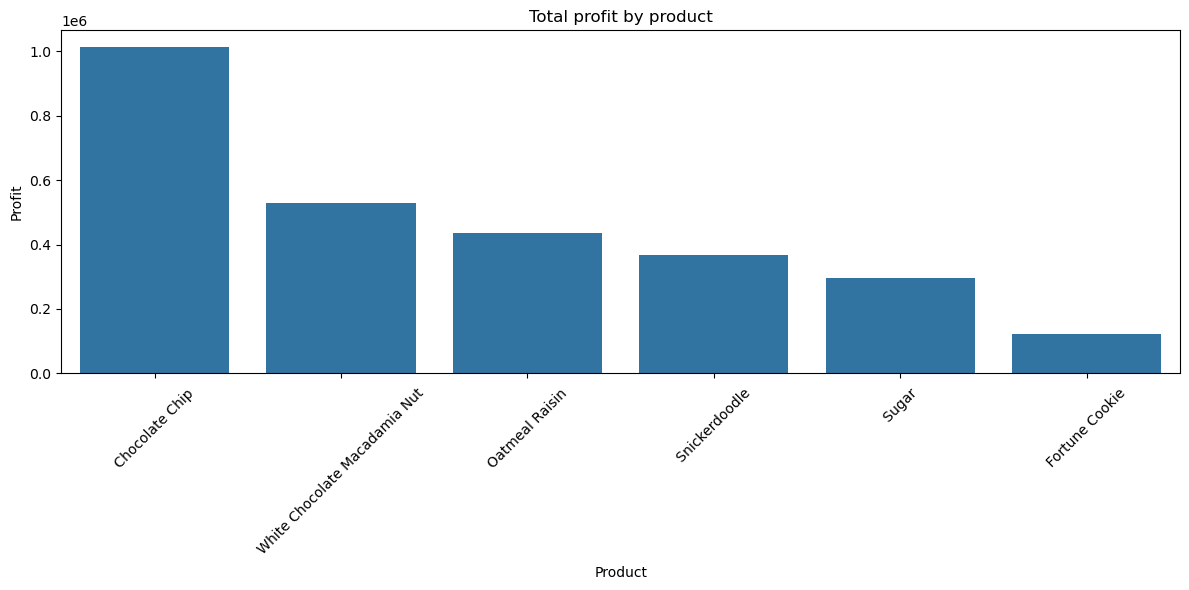


Country profitability analysis:


,Country,Units Sold,Revenue,Cost,Profit,Profit_Margin,ROI
0,Canada,247428.5,1026351.5,420033.75,606317.80,59.075063,144.349781
1,France,240931.0,1010531.5,415473.27,595058.27,58.885673,143.224201
4,United States,232627.5,977630.5,403483.16,574147.36,58.728462,142.297726
3,Mexico,203325.0,836667.0,341868.25,494798.75,59.139269,144.733753
2,Germany,201494.0,839070.0,346068.35,493001.65,58.755724,142.457884



Top 10 most profitable product-country combinations:


,Product,Country,Units Sold,Revenue,Cost,Profit,Profit_per_Unit,Profit_Margin
0,Chocolate Chip,Canada,78191.5,390957.5,156383.00,234574.50,3.00,60.000000
1,Chocolate Chip,France,71606.0,358030.0,143212.00,214818.00,3.00,60.000000
4,Chocolate Chip,United States,69466.5,347332.5,138933.00,208399.50,3.00,60.000000
3,Chocolate Chip,Mexico,63282.0,316410.0,126564.00,189846.00,3.00,60.000000
2,Chocolate Chip,Germany,55693.5,278467.5,111387.00,167080.50,3.00,60.000000
26,White Chocolate Macadamia Nut,France,36609.5,219657.0,100676.13,118980.88,3.25,54.166669
29,White Chocolate Macadamia Nut,United States,35761.0,214566.0,98342.75,116223.25,3.25,54.166667
25,White Chocolate Macadamia Nut,Canada,32464.0,194784.0,89276.01,105508.01,3.25,54.166672
27,White Chocolate Macadamia Nut,Germany,31050.0,186300.0,85387.50,100912.50,3.25,54.166667
14,Oatmeal Raisin,United States,35469.5,177347.5,78032.90,99314.60,2.80,56.000000


In [350]:
#  PROFIT OPTIMIZATION
print("\n\n6. PROFIT OPTIMIZATION")
print("-------------------------")

# Product profitability analysis
product_profitability = df.groupby('Product').agg({
    'Units Sold': 'sum',
    'Revenue': 'sum',
    'Cost': 'sum',
    'Profit': 'sum'
}).reset_index()

product_profitability['Profit_Margin'] = product_profitability['Profit'] / product_profitability['Revenue'] * 100
product_profitability['ROI'] = product_profitability['Profit'] / product_profitability['Cost'] * 100

print("\nProduct profitability analysis:")
display(product_profitability.sort_values('Profit', ascending=False))

# Visualize profitability by product
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Profit', data=product_profitability.sort_values('Profit', ascending=False))
plt.title('Total profit by product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('product_profit.png')
plt.show()

# Country profitability analysis
country_profitability = df.groupby('Country').agg({
    'Units Sold': 'sum',
    'Revenue': 'sum',
    'Cost': 'sum',
    'Profit': 'sum'
}).reset_index()

country_profitability['Profit_Margin'] = country_profitability['Profit'] / country_profitability['Revenue'] * 100
country_profitability['ROI'] = country_profitability['Profit'] / country_profitability['Cost'] * 100

print("\nCountry profitability analysis:")
display(country_profitability.sort_values('Profit', ascending=False))

# Analysis of most profitable product-country combinations
product_country_profit = df.groupby(['Product', 'Country']).agg({
    'Units Sold': 'sum',
    'Revenue': 'sum',
    'Cost': 'sum',
    'Profit': 'sum'
}).reset_index()

product_country_profit['Profit_per_Unit'] = product_country_profit['Profit'] / product_country_profit['Units Sold']
product_country_profit['Profit_Margin'] = product_country_profit['Profit'] / product_country_profit['Revenue'] * 100

print("\nTop 10 most profitable product-country combinations:")
display(product_country_profit.sort_values('Profit', ascending=False).head(10))





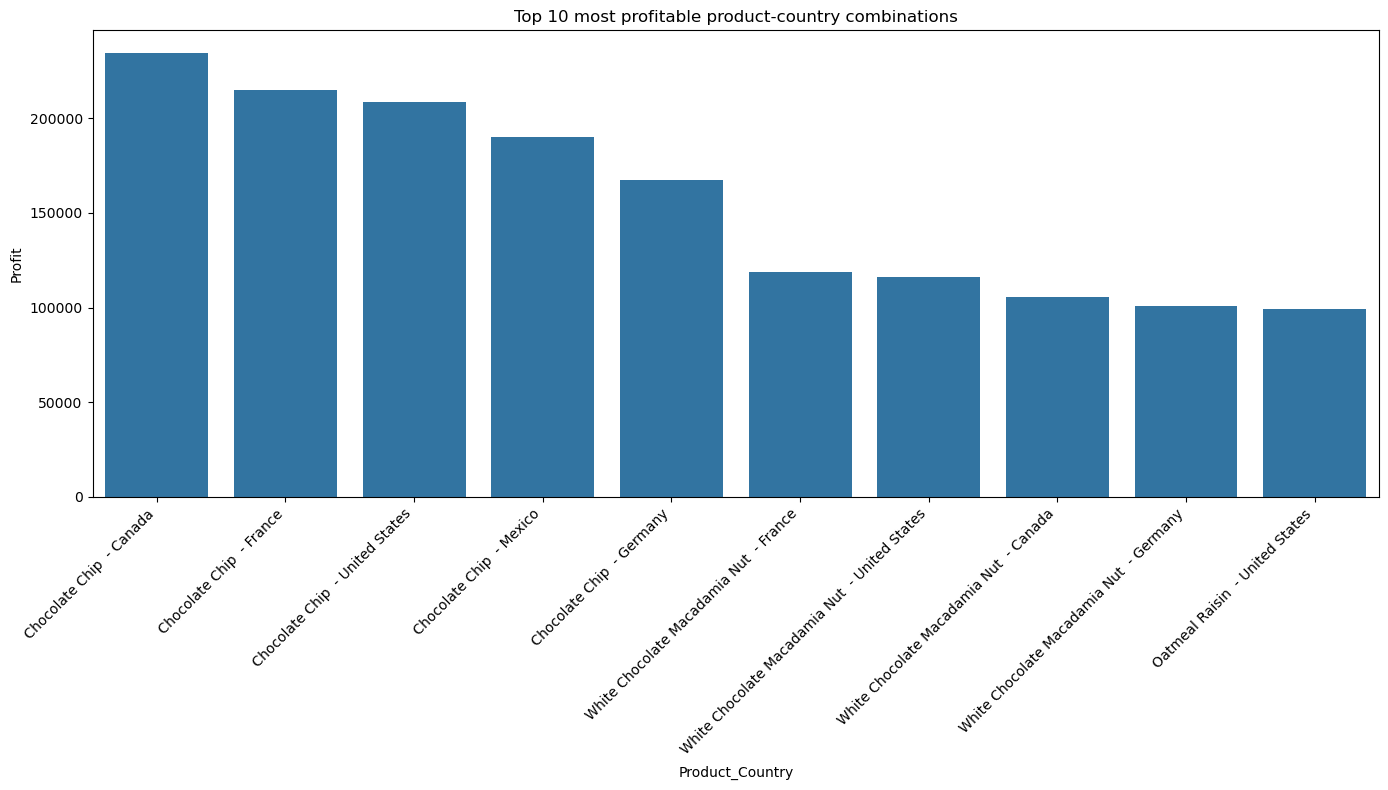

In [351]:
# Visualize top 10 product-country combinations
top10_combinations = product_country_profit.sort_values('Profit', ascending=False).head(10)
top10_combinations['Product_Country'] = top10_combinations['Product'] + ' - ' + top10_combinations['Country']

plt.figure(figsize=(14, 8))
sns.barplot(x='Product_Country', y='Profit', data=top10_combinations)
plt.title('Top 10 most profitable product-country combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top10_product_country_profit.png')
plt.show()

In [352]:
# 7. RECOMMENDATIONS FOR PROFIT OPTIMIZATION
print("\n\n7. RECOMMENDATIONS FOR PROFIT OPTIMIZATION")
print("------------------------------------------------")

# Most profitable products
top_products = product_profitability.sort_values("Profit_Margin", ascending=False)
print("\nProducts with the highest margins:")
display(top_products[["Product", "Profit_Margin", "Profit", "Units Sold"]])

# Most profitable countries
top_countries = country_profitability.sort_values("Profit_Margin", ascending=False)
print("\nCountries with the highest margins:")
display(top_countries[["Country", "Profit_Margin", "Profit", "Units Sold"]])

# Best months
best_months = seasonal_analysis.sort_values("Profit", ascending=False)
print("\nMost profitable months:")
display(best_months[["Month Name", "Profit", "Units Sold"]])

# Recommendations based on customer segments
print("\nRecommendations based on customer segments (clusters):")
for i in range(optimal_k):
    cluster_data = df[df["Cluster"] == i]
    top_products_cluster = cluster_data.groupby("Product")["Profit"].sum().sort_values(ascending=False)
    top_countries_cluster = cluster_data.groupby("Country")["Profit"].sum().sort_values(ascending=False)
    
    print(f"\nCluster {i}:")
    print(f"Most profitable products: {', '.join(top_products_cluster.index[:2])}")
    print(f"Most profitable countries: {', '.join(top_countries_cluster.index[:2])}")
    print(f"Average profit: ${cluster_data['Profit'].mean():.2f}")
    print(f"Number of sales: {len(cluster_data)}")

# Analyze price optimization opportunities
price_optimization = df.groupby(["Product", "Revenue per cookie"]).agg({
    "Units Sold": "sum",
    "Profit": "sum"
}).reset_index()

# Group by product to see the impact of different prices
for product in df["Product"].unique():
    product_data = price_optimization[price_optimization["Product"] == product]
    if len(product_data) > 1:  # Only if we have different prices for the same product
        display(f"\nPrice analysis for {product}:")
        display(product_data.sort_values("Revenue per cookie"))

# Summary of recommendations
print("\n\nSUMMARY OF PROFIT OPTIMIZATION RECOMMENDATIONS:")
print("1. Product focus: Concentrate marketing and production efforts on high-margin products.")
print("2. Geographic expansion: Expand presence in the most profitable countries.")
print("3. Seasonality: Plan promotions and increase inventory for the most profitable months.")
print("4. Customer segmentation: Tailor marketing strategies to cluster characteristics.")
print("5. Price optimization: Adjust prices according to demand sensitivity.")





7. RECOMMENDATIONS FOR PROFIT OPTIMIZATION
------------------------------------------------

Products with the highest margins:


,Product,Profit_Margin,Profit,Units Sold
1,Fortune Cookie,80.000000,123358.40,154198.0
3,Snickerdoodle,62.500000,367115.00,146846.0
0,Chocolate Chip,60.000000,1014718.50,338239.5
4,Sugar,58.333341,295370.29,168783.0
2,Oatmeal Raisin,56.000000,434882.00,155315.0
5,White Chocolate Macadamia Nut,54.166668,527879.64,162424.5



Countries with the highest margins:


,Country,Profit_Margin,Profit,Units Sold
3,Mexico,59.139269,494798.75,203325.0
0,Canada,59.075063,606317.80,247428.5
1,France,58.885673,595058.27,240931.0
2,Germany,58.755724,493001.65,201494.0
4,United States,58.728462,574147.36,232627.5



Most profitable months:


,Month Name,Profit,Units Sold
10,October,484486.65,201104.0
2,December,384764.70,155306.0
9,November,289837.10,121131.0
11,September,265778.10,107881.0
6,June,250815.45,103302.0
0,April,196750.90,78886.5
5,July,173919.82,69349.0
4,January,171305.76,67835.5
1,August,153357.20,60705.0
3,February,135968.25,55115.0



Recommendations based on customer segments (clusters):

Cluster 0:
Most profitable products:  Sugar ,  Fortune Cookie 
Most profitable countries: France, Canada
Average profit: $1772.44
Number of sales: 183

Cluster 1:
Most profitable products:  Chocolate Chip ,  Snickerdoodle 
Most profitable countries: Germany, Canada
Average profit: $2764.49
Number of sales: 274

Cluster 2:
Most profitable products:  Chocolate Chip ,  White Chocolate Macadamia Nut 
Most profitable countries: Canada, France
Average profit: $6919.75
Number of sales: 243


SUMMARY OF PROFIT OPTIMIZATION RECOMMENDATIONS:
1. Product focus: Concentrate marketing and production efforts on high-margin products.
2. Geographic expansion: Expand presence in the most profitable countries.
3. Seasonality: Plan promotions and increase inventory for the most profitable months.
4. Customer segmentation: Tailor marketing strategies to cluster characteristics.
5. Price optimization: Adjust prices according to demand sensitivity.
